<a href="https://colab.research.google.com/github/prathyusha0310/Research-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
import io
df=pd.read_excel(io.BytesIO(uploaded['Dataset.xlsx']))
df_original=df.copy()

df = df.rename(columns = {"Date (DD-MM-YYYY)":"date"}) 
df.head(5)

,date,Shift,Time,IO-Division,IO-Department,Brief Description,Incident Category,Incident Location,Impact,Activity Type,Prime Cause,Risk Type Equipment,Risk Type Environment,Risk Type Injury,Risk Type Reputation
0,2016-11-22,A,12:50:00,Engineering & Project,Steel & Mills,A slab of 17.1 T was supposed to be placed as ...,Near Miss,Workplace,First Aid,Construction Site,Fall from Height,25.0,20.0,17.0,18.0
1,2016-11-18,A,11:20:00,Engineering & Project,Steel & Mills,one small material fall freely from EOT,Near Miss,Workplace,Equipment Property Damage,Maintenance,Fall of Object,19.0,17.0,20.0,18.0
2,2016-11-18,C,22:00:00,Iron Making,Sinter Plant,During lifting of Feed drum by EOT crane ( 7.5...,Near Miss,Workplace,Equipment Property Damage,Maintenance,Fall from Height,15.0,10.0,10.0,15.0
3,2016-11-08,A,09:10:00,Jharia Division,"Engineering Services, Jharia",During shifting m. s. angle from stock to work...,Near Miss,Workplace,Equipment Property Damage,Maintenance,Unsafe loading & Unloading,20.0,23.0,25.0,34.0
4,2016-11-09,A,10:00:00,West Bokaro,Coal Beneficiation,some scrap material were accumulated in the ar...,Near Miss,Workplace,First Aid,Maintenance,Slip /trip /fall,10.0,24.0,23.0,17.0


In [ ]:
from sklearn.cluster import KMeans
print("*****In the data set*****")
print(df.isna().sum())
print("\n")


*****In the data set*****
date                      0
Shift                     0
Time                      0
IO-Division               0
IO-Department             0
Brief Description         0
Incident Category         0
Incident Location         0
Impact                    0
Activity Type             0
Prime Cause               0
Risk Type Equipment      14
Risk Type Environment    16
Risk Type Injury         14
Risk Type Reputation     14
dtype: int64




In [ ]:
df.fillna(df.mean(), inplace=True)# filling empty places with mean value of the entire column values
print(df.isna().sum())
print("\n")# checking for any left over missing values in dataset
print(df.describe())

date                     0
Shift                    0
Time                     0
IO-Division              0
IO-Department            0
Brief Description        0
Incident Category        0
Incident Location        0
Impact                   0
Activity Type            0
Prime Cause              0
Risk Type Equipment      0
Risk Type Environment    0
Risk Type Injury         0
Risk Type Reputation     0
dtype: int64


       Risk Type Equipment   ...  Risk Type Reputation
count            176.000000  ...            176.000000
mean              19.648148  ...             17.524691
std                4.165809  ...              2.395712
min                4.000000  ...             15.000000
25%               15.000000  ...             15.000000
50%               19.000000  ...             18.000000
75%               25.000000  ...             18.000000
max               26.000000  ...             34.000000

[8 rows x 4 columns]


In [ ]:
#categorical variables:{Shift ,IO-Division,IO-Department,Brief Description,Incident Category,Incident Location,Impact,Activity Type,Prime Cause}
#continuos Variables:{Risk Type Equipment,Risk Type Environment,Risk Type Injury,Risk Type Reputation}
#Date_time Variables:{Date,Time}

In [ ]:
import seaborn as sns
df[["Shift","Risk Type Injury"]].groupby(['Shift'],as_index=False).mean().sort_values(by='Shift',ascending=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Shift,Risk Type Injury
0,A,15.876599
1,B,16.570602
2,C,16.500000


In [ ]:
df[["Prime Cause","Risk Type Injury"]].groupby(['Prime Cause'],as_index=False).mean().sort_values(by='Prime Cause',ascending=True)

,Prime Cause,Risk Type Injury
0,Electrical fault,14.857143
1,Fall from Height,15.162963
2,Fall of Object,16.340535
3,Hit by Object,16.557568
4,Man-Machine Interface,16.019943
5,Side fall of material,14.521605
6,Slip /trip /fall,17.328704
7,Unsafe loading & Unloading,15.906250


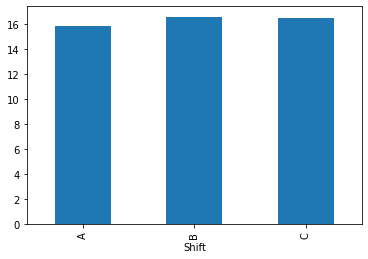

In [ ]:
#here we have observed that risk type injury is almost similar for each shift (irrespective of the shifts)
df.groupby('Shift')['Risk Type Injury'].mean().plot.bar()

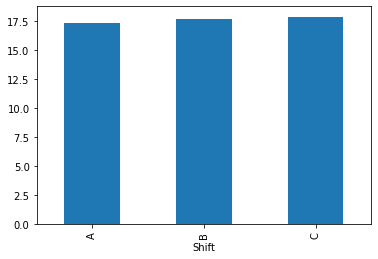

In [ ]:
df.groupby('Shift')['Risk Type Reputation'].mean().plot.bar()

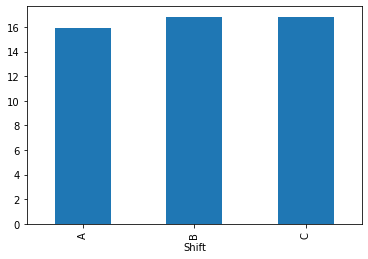

In [ ]:
df.groupby('Shift')['Risk Type Environment'].mean().plot.bar()#all the three shifts have almost same level of risk type Environment

In [ ]:
df['Datetime']=pd.to_datetime(df['date'].astype(str) + ' ' + df['Time'].astype(str))
df.head()

,date,Shift,Time,IO-Division,IO-Department,Brief Description,Incident Category,Incident Location,Impact,Activity Type,Prime Cause,Risk Type Equipment,Risk Type Environment,Risk Type Injury,Risk Type Reputation,Datetime
0,2016-11-22,A,12:50:00,Engineering & Project,Steel & Mills,A slab of 17.1 T was supposed to be placed as ...,Near Miss,Workplace,First Aid,Construction Site,Fall from Height,25.0,20.0,17.0,18.0,2016-11-22 12:50:00
1,2016-11-18,A,11:20:00,Engineering & Project,Steel & Mills,one small material fall freely from EOT,Near Miss,Workplace,Equipment Property Damage,Maintenance,Fall of Object,19.0,17.0,20.0,18.0,2016-11-18 11:20:00
2,2016-11-18,C,22:00:00,Iron Making,Sinter Plant,During lifting of Feed drum by EOT crane ( 7.5...,Near Miss,Workplace,Equipment Property Damage,Maintenance,Fall from Height,15.0,10.0,10.0,15.0,2016-11-18 22:00:00
3,2016-11-08,A,09:10:00,Jharia Division,"Engineering Services, Jharia",During shifting m. s. angle from stock to work...,Near Miss,Workplace,Equipment Property Damage,Maintenance,Unsafe loading & Unloading,20.0,23.0,25.0,34.0,2016-11-08 09:10:00
4,2016-11-09,A,10:00:00,West Bokaro,Coal Beneficiation,some scrap material were accumulated in the ar...,Near Miss,Workplace,First Aid,Maintenance,Slip /trip /fall,10.0,24.0,23.0,17.0,2016-11-09 10:00:00


In [ ]:
list_month=[]
list_day=[]
list_dayofweek=[]
list_hour=[]
for i in df['Datetime']:
  list_month.append(i.month)
  list_day.append(i.day)
  list_dayofweek.append(i.dayofweek)
for i in df['Time']:
  list_hour.append(i.hour)

  #df['month']=i.month
  #df['day']=i.day
#df.head()
#df['month']
#df.groupby('month')['Risk Type Reputation'].mean().plot.bar()
montharr=np.asarray(list_month)
dayarr=np.asarray(list_day)
dowarr=np.asarray(list_dayofweek)
hourarr=np.asarray(list_hour)
df['month']=montharr
df['day']=dayarr
df['dayofweek']=dowarr
df['hour']=hourarr
df.head()

,date,Shift,Time,IO-Division,IO-Department,Brief Description,Incident Category,Incident Location,Impact,Activity Type,Prime Cause,Risk Type Equipment,Risk Type Environment,Risk Type Injury,Risk Type Reputation,Datetime,month,day,dayofweek,hour
0,2016-11-22,A,12:50:00,Engineering & Project,Steel & Mills,A slab of 17.1 T was supposed to be placed as ...,Near Miss,Workplace,First Aid,Construction Site,Fall from Height,25.0,20.0,17.0,18.0,2016-11-22 12:50:00,11,22,1,12
1,2016-11-18,A,11:20:00,Engineering & Project,Steel & Mills,one small material fall freely from EOT,Near Miss,Workplace,Equipment Property Damage,Maintenance,Fall of Object,19.0,17.0,20.0,18.0,2016-11-18 11:20:00,11,18,4,11
2,2016-11-18,C,22:00:00,Iron Making,Sinter Plant,During lifting of Feed drum by EOT crane ( 7.5...,Near Miss,Workplace,Equipment Property Damage,Maintenance,Fall from Height,15.0,10.0,10.0,15.0,2016-11-18 22:00:00,11,18,4,22
3,2016-11-08,A,09:10:00,Jharia Division,"Engineering Services, Jharia",During shifting m. s. angle from stock to work...,Near Miss,Workplace,Equipment Property Damage,Maintenance,Unsafe loading & Unloading,20.0,23.0,25.0,34.0,2016-11-08 09:10:00,11,8,1,9
4,2016-11-09,A,10:00:00,West Bokaro,Coal Beneficiation,some scrap material were accumulated in the ar...,Near Miss,Workplace,First Aid,Maintenance,Slip /trip /fall,10.0,24.0,23.0,17.0,2016-11-09 10:00:00,11,9,2,10


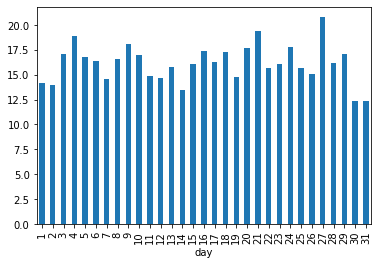

In [ ]:
df.groupby('day')['Risk Type Environment'].mean().plot.bar()

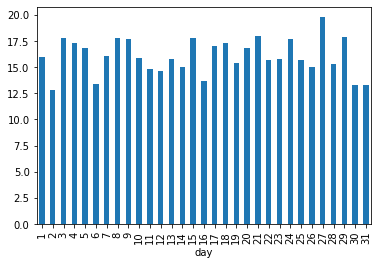

In [ ]:
df.groupby('day')['Risk Type Injury'].mean().plot.bar()

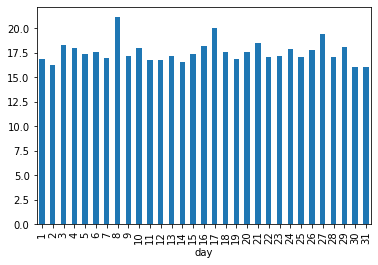

In [ ]:
df.groupby('day')['Risk Type Reputation'].mean().plot.bar()

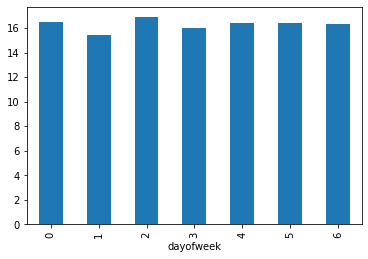

In [ ]:
df.groupby('dayofweek')['Risk Type Environment'].mean().plot.bar()

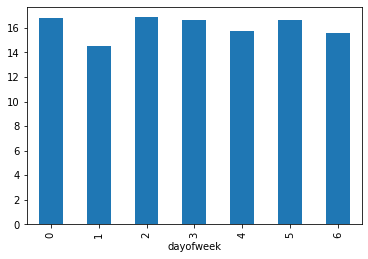

In [ ]:
df.groupby('dayofweek')['Risk Type Injury'].mean().plot.bar()

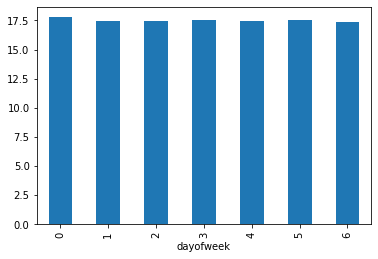

In [ ]:
df.groupby('dayofweek')['Risk Type Reputation'].mean().plot.bar()

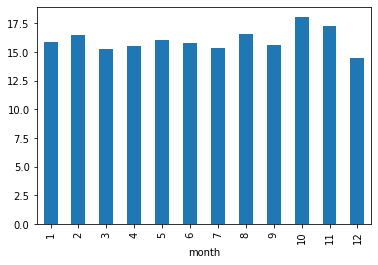

In [ ]:
df.groupby('month')['Risk Type Injury'].mean().plot.bar()

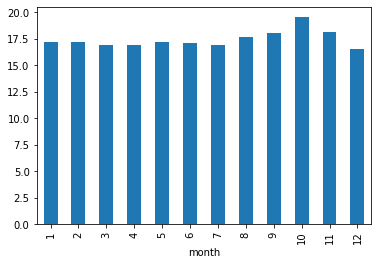

In [ ]:
df.groupby('month')['Risk Type Reputation'].mean().plot.bar()

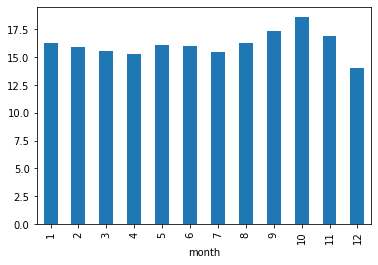

In [ ]:
df.groupby('month')['Risk Type Environment'].mean().plot.bar()

In [ ]:
#By observing the dataset we can determine that date,Incident category,Incident location(uniform throughout the data) doesnt contribute to the dependent quantity
#df=df.drop(labels={"Date (DD-MM-YYYY)","Time","Brief Description","Shift","Impact","Activity Type","Incident Category","Incident Location","IO-Division","IO-Department","Prime Cause"},axis=1)
#df.head()

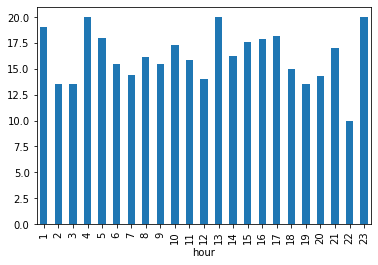

In [ ]:
df.groupby('hour')['Risk Type Environment'].mean().plot.bar()

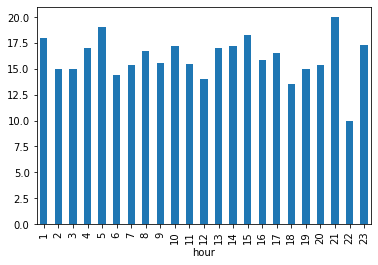

In [ ]:
df.groupby('hour')['Risk Type Injury'].mean().plot.bar()

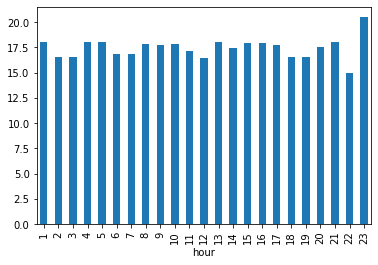

In [ ]:
df.groupby('hour')['Risk Type Reputation'].mean().plot.bar()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Index(['date', 'Shift', 'Time', 'IO-Division', 'IO-Department',
       'Brief Description', 'Incident Category', 'Incident Location', 'Impact',
       'Activity Type', 'Prime Cause', 'Risk Type Equipment ',
       'Risk Type Environment', 'Risk Type Injury', 'Risk Type Reputation',
       'Datetime', 'month', 'day', 'dayofweek', 'hour'],
      dtype='object')


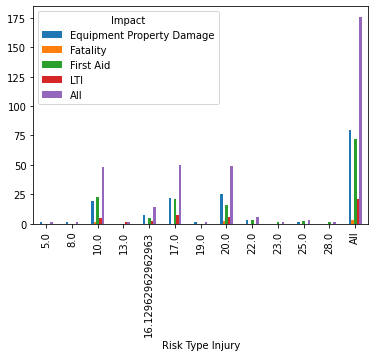

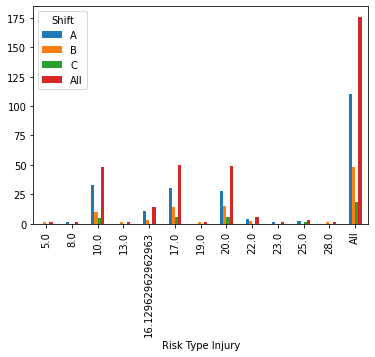

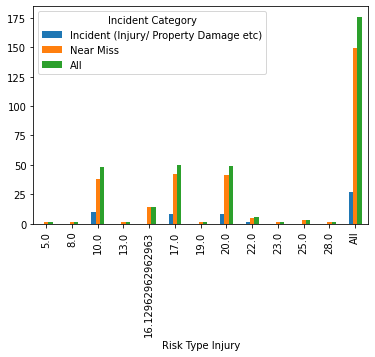

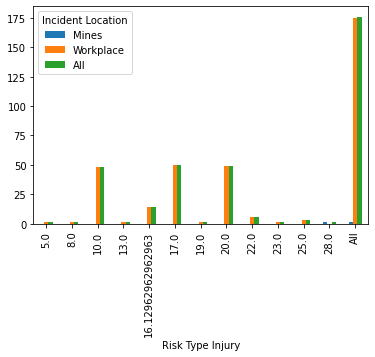

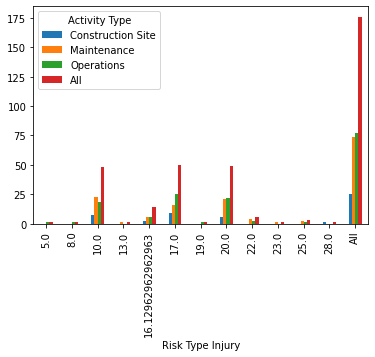

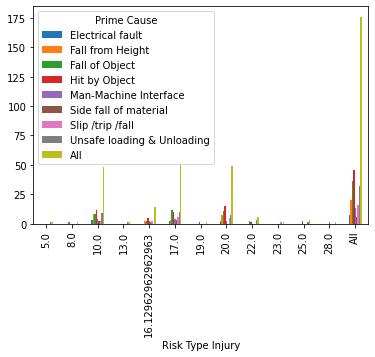

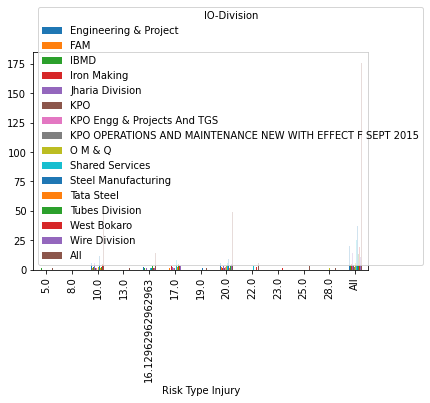

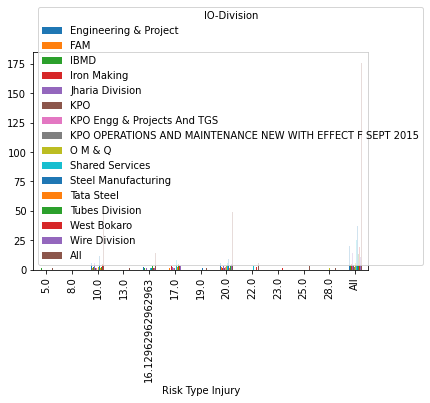

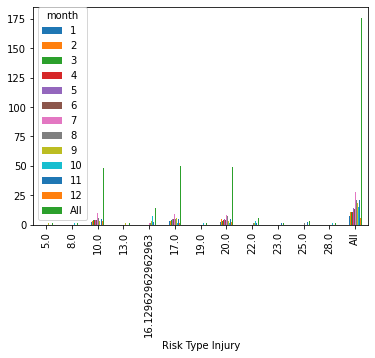

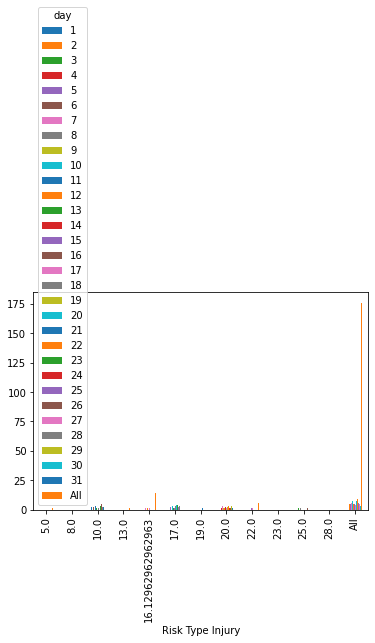

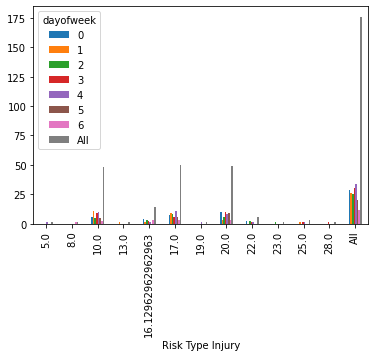

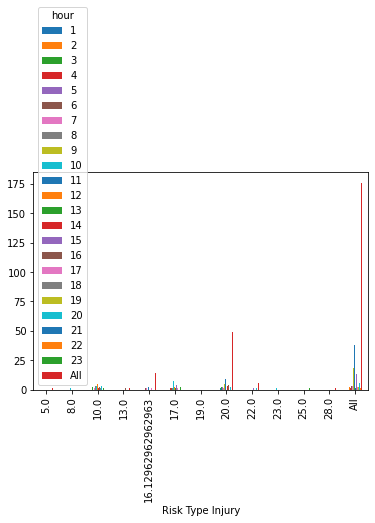

In [ ]:
print(pd.crosstab(df["Risk Type Injury"],df["Impact"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Shift"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Incident Category"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Incident Location"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Activity Type"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Prime Cause"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["IO-Division"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["IO-Division"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["month"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["day"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["dayofweek"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["hour"], margins = True).plot.bar())
print(df.columns)

In [ ]:
df[["IO-Division","Risk Type Injury"]].groupby(['IO-Division'],as_index=False).mean().sort_values(by='IO-Division',ascending=True)

,IO-Division,Risk Type Injury
0,Engineering & Project,15.712963
1,FAM,16.484127
2,IBMD,10.282407
3,Iron Making,16.200000
4,Jharia Division,15.723545
5,KPO,16.000000
6,KPO Engg & Projects And TGS,17.800000
7,KPO OPERATIONS AND MAINTENANCE NEW WITH EFFECT...,15.000000
8,O M & Q,18.000000
9,Shared Services,16.925185


In [ ]:
df[["IO-Division","Risk Type Environment"]].groupby(['IO-Division'],as_index=False).mean().sort_values(by='IO-Division',ascending=True)

,IO-Division,Risk Type Environment
0,Engineering & Project,15.728125
1,FAM,16.120536
2,IBMD,13.820312
3,Iron Making,17.400000
4,Jharia Division,15.377232
5,KPO,16.750000
6,KPO Engg & Projects And TGS,15.800000
7,KPO OPERATIONS AND MAINTENANCE NEW WITH EFFECT...,21.000000
8,O M & Q,16.333333
9,Shared Services,17.171250


In [ ]:
df[["IO-Division","Risk Type Reputation"]].groupby(['IO-Division'],as_index=False).mean().sort_values(by='IO-Division',ascending=True)

,IO-Division,Risk Type Reputation
0,Engineering & Project,17.052469
1,FAM,17.007055
2,IBMD,18.500000
3,Iron Making,17.400000
4,Jharia Division,18.323192
5,KPO,17.250000
6,KPO Engg & Projects And TGS,16.800000
7,KPO OPERATIONS AND MAINTENANCE NEW WITH EFFECT...,20.000000
8,O M & Q,18.166667
9,Shared Services,18.100988


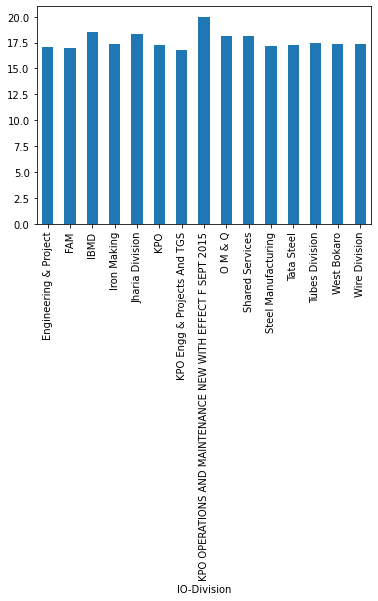

In [ ]:
df.groupby('IO-Division')['Risk Type Reputation'].mean().plot.bar()

In [ ]:
df[["Impact","Risk Type Reputation"]].groupby(['Impact'],as_index=False).mean().sort_values(by='Impact',ascending=True)

,Impact,Risk Type Reputation
0,Equipment Property Damage,17.808410
1,Fatality,17.000000
2,First Aid,17.258659
3,LTI,17.430923


In [ ]:
df[["Impact","Risk Type Injury"]].groupby(['Impact'],as_index=False).mean().sort_values(by='Impact',ascending=True)

,Impact,Risk Type Injury
0,Equipment Property Damage,16.248843
1,Fatality,16.666667
2,First Aid,16.036780
3,LTI,15.917108


In [ ]:
df[["Impact","Risk Type Environment"]].groupby(['Impact'],as_index=False).mean().sort_values(by='Impact',ascending=True)

,Impact,Risk Type Environment
0,Equipment Property Damage,16.465625
1,Fatality,14.666667
2,First Aid,16.078993
3,LTI,16.502976


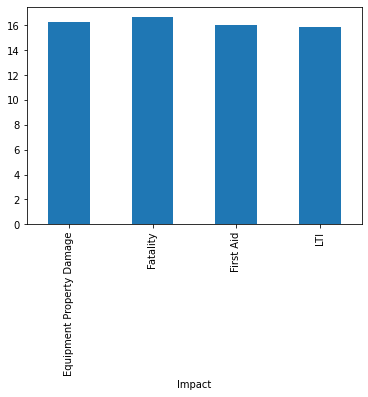

In [ ]:
df.groupby('Impact')['Risk Type Injury'].mean().plot.bar()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Index(['date', 'Shift', 'Time', 'IO-Division', 'IO-Department',
       'Brief Description', 'Incident Category', 'Incident Location', 'Impact',
       'Activity Type', 'Prime Cause', 'Risk Type Equipment ',
       'Risk Type Environment', 'Risk Type Injury', 'Risk Type Reputation',
       'Datetime', 'month', 'day', 'dayofweek', 'hour'],
      dtype='object')


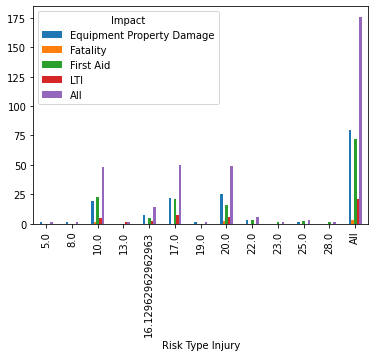

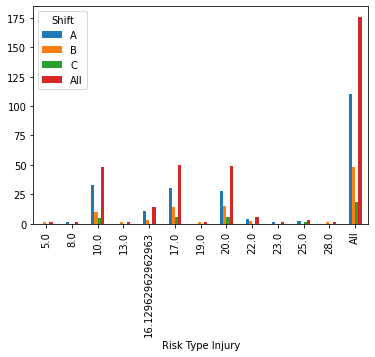

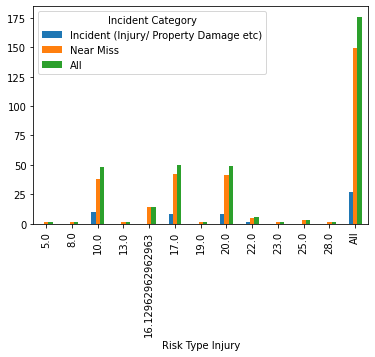

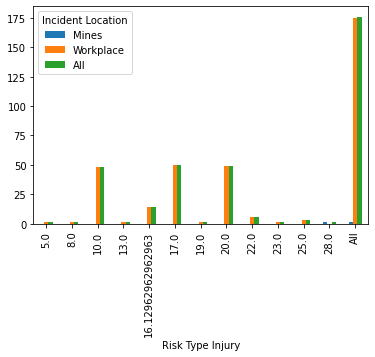

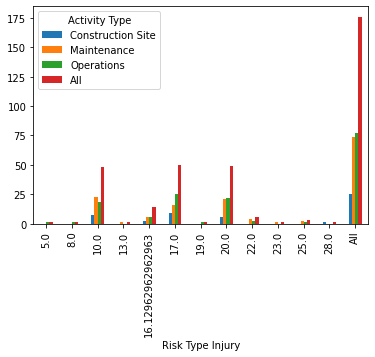

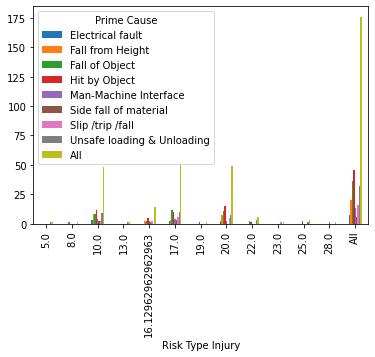

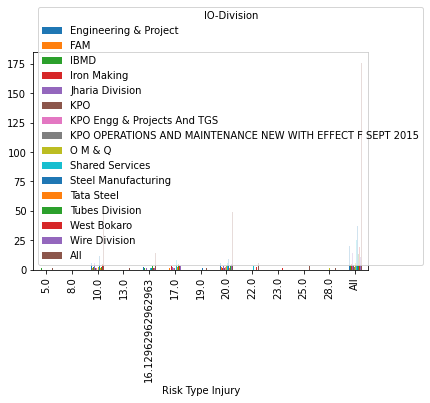

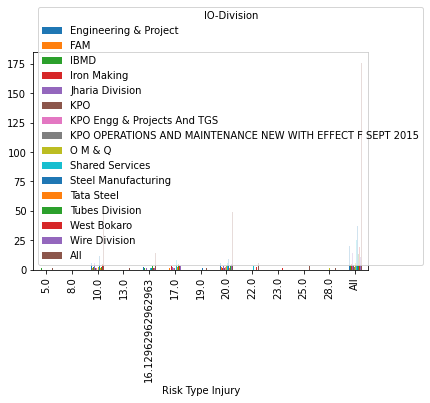

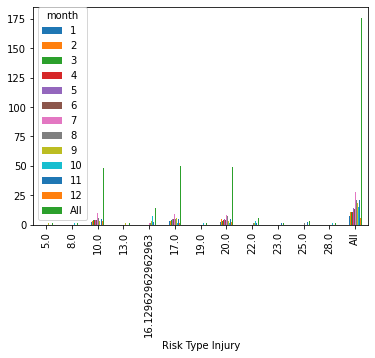

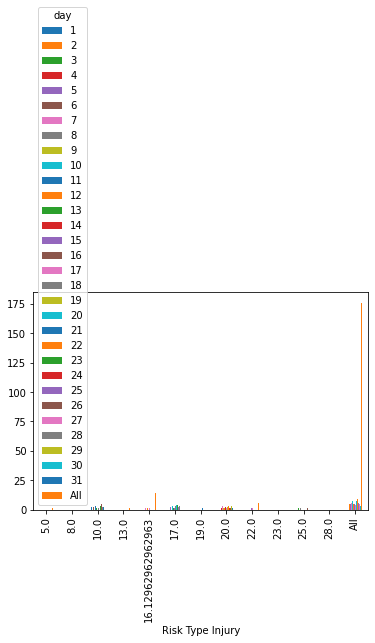

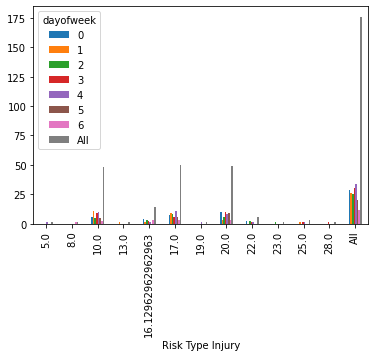

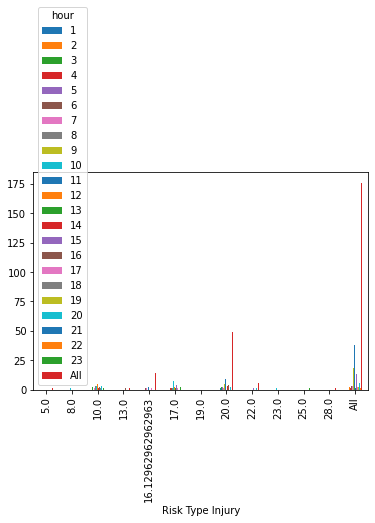

In [ ]:
print(pd.crosstab(df["Risk Type Injury"],df["Impact"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Shift"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Incident Category"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Incident Location"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Activity Type"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["Prime Cause"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["IO-Division"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["IO-Division"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["month"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["day"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["dayofweek"], margins = True).plot.bar())
print(pd.crosstab(df["Risk Type Injury"],df["hour"], margins = True).plot.bar())
print(df.columns)

In [ ]:
print(pd.crosstab(df["Shift"],df["Risk Type Injury"], margins = True))

Risk Type Injury  5.0  8.0  10.0  13.0  ...  23.0  25.0  28.0  All
Shift                                   ...                       
A                   0    1    33     0  ...     1     2     0  110
B                   1    0    10     1  ...     0     0     1   48
C                   0    0     5     0  ...     0     1     0   18
All                 1    1    48     1  ...     1     3     1  176

[4 rows x 13 columns]


In [ ]:
print(pd.crosstab(df["IO-Division"],df["Risk Type Injury"], margins = True))

Risk Type Injury                                    5.0  8.0  ...  28.0  All
IO-Division                                                   ...           
Engineering & Project                                 0    0  ...     0   20
FAM                                                   0    0  ...     0    7
IBMD                                                  1    0  ...     0    4
Iron Making                                           0    0  ...     0    5
Jharia Division                                       0    0  ...     0   14
KPO                                                   0    0  ...     0    4
KPO Engg & Projects And TGS                           0    0  ...     0    5
KPO OPERATIONS AND MAINTENANCE NEW WITH EFFECT ...    0    0  ...     0    2
O M & Q                                               0    0  ...     1    6
Shared Services                                       0    0  ...     0   25
Steel Manufacturing                                   0    1  ...     0   37

In [ ]:
print(pd.crosstab(df["Incident Category"],df["Risk Type Injury"], margins = True))

Risk Type Injury                        5.0  8.0  10.0  ...  25.0  28.0  All
Incident Category                                       ...                 
Incident (Injury/ Property Damage etc)    0    0    10  ...     0     0   27
Near Miss                                 1    1    38  ...     3     1  149
All                                       1    1    48  ...     3     1  176

[3 rows x 13 columns]


In [ ]:
print(pd.crosstab(df["Incident Location"],df["Risk Type Injury"], margins = True))

Risk Type Injury   5.0  8.0  10.0  13.0  ...  23.0  25.0  28.0  All
Incident Location                        ...                       
Mines                0    0     0     0  ...     0     0     1    1
Workplace            1    1    48     1  ...     1     3     0  175
All                  1    1    48     1  ...     1     3     1  176

[3 rows x 13 columns]


In [ ]:
print(pd.crosstab(df["Activity Type"],df["Risk Type Injury"], margins = True))

Risk Type Injury   5.0  8.0  10.0  13.0  ...  23.0  25.0  28.0  All
Activity Type                            ...                       
Construction Site    0    0     7     0  ...     0     0     1   25
Maintenance          0    0    23     1  ...     1     2     0   74
Operations           1    1    18     0  ...     0     1     0   77
All                  1    1    48     1  ...     1     3     1  176

[4 rows x 13 columns]


In [ ]:
print(pd.crosstab(df["Prime Cause"],df["Risk Type Injury"], margins = True))

Risk Type Injury            5.0  8.0  10.0  13.0  ...  23.0  25.0  28.0  All
Prime Cause                                       ...                       
Electrical fault              0    0     3     0  ...     0     0     0    7
Fall from Height              0    0     8     0  ...     0     0     0   20
Fall of Object                0    1     8     0  ...     0     0     0   36
Hit by Object                 0    0    12     0  ...     0     2     0   46
Man-Machine Interface         0    0     4     0  ...     0     0     1   13
Side fall of material         0    0     2     0  ...     0     0     0    6
Slip /trip /fall              0    0     2     0  ...     1     0     0   16
Unsafe loading & Unloading    1    0     9     1  ...     0     1     0   32
All                           1    1    48     1  ...     1     3     1  176

[9 rows x 13 columns]


In [ ]:
print(pd.crosstab(df["Impact"],df["Risk Type Environment"], margins = True))
print(pd.crosstab(df["Shift"],df["Risk Type Environment"], margins = True))
print(pd.crosstab(df["IO-Division"],df["Risk Type Environment"], margins = True))
print(pd.crosstab(df["Incident Category"],df["Risk Type Environment"], margins = True))
print(pd.crosstab(df["Incident Location"],df["Risk Type Environment"], margins = True))
print(pd.crosstab(df["Activity Type"],df["Risk Type Environment"], margins = True))
print(pd.crosstab(df["Prime Cause"],df["Risk Type Environment"], margins = True))

Risk Type Environment      10.0  15.0  16.28125  17.0  ...  24.0  25.0  27.0  All
Impact                                                 ...                       
Equipment Property Damage    19     0         8    25  ...     0     1     0   80
Fatality                      1     0         0     2  ...     0     0     0    3
First Aid                    23     1         6    16  ...     1     2     1   72
LTI                           5     0         2     6  ...     0     0     0   21
All                          48     1        16    49  ...     1     3     1  176

[5 rows x 12 columns]
Risk Type Environment  10.0  15.0  16.28125  17.0  ...  24.0  25.0  27.0  All
Shift                                              ...                       
A                        33     0        13    28  ...     1     1     0  110
B                        10     1         3    15  ...     0     0     1   48
C                         5     0         0     6  ...     0     2     0   18
All          

In [ ]:
print(pd.crosstab(df["Impact"],df["Risk Type Reputation"], margins = True))
print(pd.crosstab(df["Shift"],df["Risk Type Reputation"], margins = True))
print(pd.crosstab(df["IO-Division"],df["Risk Type Reputation"], margins = True))
print(pd.crosstab(df["Incident Category"],df["Risk Type Reputation"], margins = True))
print(pd.crosstab(df["Incident Location"],df["Risk Type Reputation"], margins = True))
print(pd.crosstab(df["Activity Type"],df["Risk Type Reputation"], margins = True))
print(pd.crosstab(df["Prime Cause"],df["Risk Type Reputation"], margins = True))

Risk Type Reputation       15.0  17.0  17.52469135802469  ...  25.0  34.0  All
Impact                                                    ...                 
Equipment Property Damage    19     0                  7  ...     1     1   80
Fatality                      1     0                  0  ...     0     0    3
First Aid                    25     1                  5  ...     3     0   72
LTI                           5     0                  2  ...     0     0   21
All                          50     1                 14  ...     4     1  176

[5 rows x 10 columns]
Risk Type Reputation  15.0  17.0  17.52469135802469  ...  25.0  34.0  All
Shift                                                ...                 
A                       34     1                 11  ...     2     1  110
B                       11     0                  3  ...     1     0   48
C                        5     0                  0  ...     1     0   18
All                     50     1                 14  .

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#one_hot_encoder= OneHotEncoder(handle_unknown='ignore')
#enc_df = pd.DataFrame(one_hot_encoder.fit_transform(df['Activity Type']).toarray())
#df = df.join(enc_df)
#df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Shift']=labelencoder.fit_transform(df['Shift'])
print(df['Shift'].max())
df['Prime Cause']=labelencoder.fit_transform(df['Prime Cause'])
print(df['Prime Cause'].max())
df['IO-Division']=labelencoder.fit_transform(df['IO-Division'])
print(df['IO-Division'].max())
df['Impact']=labelencoder.fit_transform(df['Impact'])
print(df['Impact'].max())

2
7
14
3


In [ ]:
df['Incident Category']=labelencoder.fit_transform(df['Incident Category'])
print(df['Incident Category'].max())

1


In [ ]:
df['Incident Location']=labelencoder.fit_transform(df['Incident Location'])
print(df['Incident Location'].max())

1


In [ ]:
df['Activity Type']=labelencoder.fit_transform(df['Activity Type'])
print(df['Activity Type'].max())
print(df['Shift'].max())
#df["Activity Type"]= df["Activity Type"] == 1
#df['Shift']=   df['Shift']== 1 


2
2


In [ ]:
print(df.describe())
print(df.columns)

            Shift  IO-Division  ...   dayofweek        hour
count  176.000000   176.000000  ...  176.000000  176.000000
mean     0.477273     7.920455  ...    2.693182   11.579545
std      0.675739     4.447077  ...    1.844578    4.397978
min      0.000000     0.000000  ...    0.000000    1.000000
25%      0.000000     4.000000  ...    1.000000    9.000000
50%      0.000000     9.000000  ...    3.000000   11.000000
75%      1.000000    11.000000  ...    4.000000   15.000000
max      2.000000    14.000000  ...    6.000000   23.000000

[8 rows x 15 columns]
Index(['date', 'Shift', 'Time', 'IO-Division', 'IO-Department',
       'Brief Description', 'Incident Category', 'Incident Location', 'Impact',
       'Activity Type', 'Prime Cause', 'Risk Type Equipment ',
       'Risk Type Environment', 'Risk Type Injury', 'Risk Type Reputation',
       'Datetime', 'month', 'day', 'dayofweek', 'hour'],
      dtype='object')


In [ ]:
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit
Y_injury=df['Risk Type Injury']
X_injury = df.drop(["Risk Type Injury"], axis=1)
X_injury= X_injury.drop(['date','Time','IO-Department','Brief Description', 'Datetime', 'month', 'day', 'dayofweek', 'hour'],axis=1)
#X=df['Risk Type Equipment','Risk Type Environment','Risk Type Reputation']
#train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
print(X_injury.head())
X_injury= X_injury.apply (pd.to_numeric, errors='coerce')
X_injury =  X_injury.replace(np.nan,0)
Y_injury = Y_injury.apply (pd.to_numeric, errors='coerce')
Y_injury =  Y_injury.replace(np.nan,0)
X_injury.isnull().values.any()
X_injury.isnull().sum().sum()
Y_injury.head()

   Shift  IO-Division  ...  Risk Type Environment  Risk Type Reputation
0      0            0  ...                   20.0                  18.0
1      0            0  ...                   17.0                  18.0
2      2            3  ...                   10.0                  15.0
3      0            4  ...                   23.0                  34.0
4      0           13  ...                   24.0                  17.0

[5 rows x 10 columns]


0    17.0
1    20.0
2    10.0
3    25.0
4    23.0
Name: Risk Type Injury, dtype: float64

In [ ]:
import statsmodels.api as sm
#X = sm.add_constant(X)
Y_injury= (Y_injury- min(Y_injury))/(max(Y_injury)-min(Y_injury))  
from sklearn import preprocessing
x_injury = X_injury.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_injury_scaled = min_max_scaler.fit_transform(X_injury)
X_injury = pd.DataFrame(x_injury_scaled)
X_injury.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,1.0,1.0,0.666667,0.0,0.142857,0.954545,0.588235,0.157895
1,0.0,0.000000,1.0,1.0,0.000000,0.5,0.285714,0.681818,0.411765,0.157895
2,1.0,0.214286,1.0,1.0,0.000000,0.5,0.142857,0.500000,0.000000,0.000000
3,0.0,0.285714,1.0,1.0,0.000000,0.5,1.000000,0.727273,0.764706,1.000000
4,0.0,0.928571,1.0,1.0,0.666667,0.5,0.857143,0.272727,0.823529,0.105263


In [ ]:
model_injury=Probit(Y_injury,X_injury.astype(float))
probit_model_injury = model_injury.fit(maxiter=35)
print(probit_model_injury.summary())
mdl_inj=Logit(Y_injury,X_injury.astype(float))
logit_mdl_inj=mdl_inj.fit(maxiter=35)
print(logit_mdl_inj.summary())

         Current function value: 0.689492
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:       Risk Type Injury   No. Observations:                  176
Model:                         Probit   Df Residuals:                      166
Method:                           MLE   Df Model:                            9
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:               0.0001719
Time:                        07:12:30   Log-Likelihood:                -121.35
converged:                      False   LL-Null:                       -121.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              1.1669      0.590      1.977      0.048       0.010       2.324
1             -2.9214      0.577     -5.065      0.000      -4.05

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
mfx = probit_model_injury.get_margeff()
print(mfx.summary())
mlx = logit_mdl_inj.get_margeff()
print(mlx.summary())

       Probit Marginal Effects       
Dep. Variable:       Risk Type Injury
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0262      0.016      1.592      0.111      -0.006       0.059
1             -0.0657      0.015     -4.354      0.000      -0.095      -0.036
2              0.0057      0.011      0.509      0.610      -0.016       0.028
3             -0.4052      0.064     -6.333      0.000      -0.531      -0.280
4             -0.0126      0.011     -1.123      0.261      -0.035       0.009
5              0.0674      0.012      5.743      0.000       0.044       0.090
6             -0.0099      0.014     -0.735      0.462      -0.036       0.017
7              0.6542      0.088      7.454      0.000       0.482       0.826
8             -0.0691      0.009     -7.613      0.000    

In [ ]:
Y_Environment=df['Risk Type Environment']
X_Environment = df.drop(["Risk Type Environment"], axis=1)
X_Environment= X_Environment.drop(['date','Time','IO-Department','Brief Description', 'Datetime', 'month', 'day', 'dayofweek', 'hour'],axis=1)
#X=df['Risk Type Equipment','Risk Type Environment','Risk Type Reputation']
#train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
print(X_Environment.head())
X_Environment= X_Environment.apply (pd.to_numeric, errors='coerce')
X_Environment =  X_Environment.replace(np.nan,0)
Y_Environment = Y_Environment.apply (pd.to_numeric, errors='coerce')
Y_Environment =  Y_Environment.replace(np.nan,0)
X_Environment.isnull().values.any()
X_Environment.isnull().sum().sum()
Y_Environment.head()

   Shift  IO-Division  ...  Risk Type Injury  Risk Type Reputation
0      0            0  ...              17.0                  18.0
1      0            0  ...              20.0                  18.0
2      2            3  ...              10.0                  15.0
3      0            4  ...              25.0                  34.0
4      0           13  ...              23.0                  17.0

[5 rows x 10 columns]


0    20.0
1    17.0
2    10.0
3    23.0
4    24.0
Name: Risk Type Environment, dtype: float64

In [ ]:
Y_Environment= (Y_Environment- min(Y_Environment))/(max(Y_Environment)-min(Y_Environment))  
from sklearn import preprocessing
X_Environment = X_Environment.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_Environment_scaled = min_max_scaler.fit_transform(X_Environment)
X_Environment = pd.DataFrame(x_Environment_scaled)
X_Environment.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,1.0,1.0,0.666667,0.0,0.142857,0.954545,0.521739,0.157895
1,0.0,0.000000,1.0,1.0,0.000000,0.5,0.285714,0.681818,0.652174,0.157895
2,1.0,0.214286,1.0,1.0,0.000000,0.5,0.142857,0.500000,0.217391,0.000000
3,0.0,0.285714,1.0,1.0,0.000000,0.5,1.000000,0.727273,0.869565,1.000000
4,0.0,0.928571,1.0,1.0,0.666667,0.5,0.857143,0.272727,0.782609,0.105263


In [ ]:
model_Environment=Probit(Y_Environment,X_Environment.astype(float))
probit_model_Environment = model_Environment.fit(maxiter=35)
print(probit_model_Environment.summary())
mdl_env=Logit(Y_Environment,X_Environment.astype(float))
logit_mdl_env=mdl_env.fit(maxiter=35)
print(logit_mdl_env.summary())

         Current function value: 0.362236
         Iterations: 35
                            Probit Regression Results                            
Dep. Variable:     Risk Type Environment   No. Observations:                  176
Model:                            Probit   Df Residuals:                      166
Method:                              MLE   Df Model:                            9
Date:                   Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3661
Time:                           07:12:30   Log-Likelihood:                -63.754
converged:                         False   LL-Null:                       -100.57
Covariance Type:               nonrobust   LLR p-value:                 2.948e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.3823      0.599      0.639      0.523      -0.791       1.555
1              5.3385      0.857      6.2

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
mfx = probit_model_Environment.get_margeff()
print(mfx.summary())
mlx = logit_mdl_env.get_margeff()
print(mlx.summary())

        Probit Marginal Effects         
Dep. Variable:     Risk Type Environment
Method:                             dydx
At:                              overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0195      0.032      0.618      0.537      -0.042       0.081
1              0.2727      0.052      5.198      0.000       0.170       0.375
2             -0.0305      0.033     -0.925      0.355      -0.095       0.034
3             -1.0980      0.109    -10.086      0.000      -1.311      -0.885
4              0.1442      0.045      3.227      0.001       0.057       0.232
5             -0.1902      0.050     -3.786      0.000      -0.289      -0.092
6              0.3762      0.064      5.905      0.000       0.251       0.501
7              0.8605      0.074     11.640      0.000       0.716       1.005
8             -0.3209      0.198     -1.623   

In [ ]:
Y_reputation=df['Risk Type Reputation']
X_reputation = df.drop(["Risk Type Reputation"], axis=1)
X_reputation= X_reputation.drop(['date','Time','IO-Department','Brief Description', 'Datetime', 'month', 'day', 'dayofweek', 'hour'],axis=1)
#X=df['Risk Type Equipment','Risk Type Environment','Risk Type Reputation']
#train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
print(X_reputation.head())
X_reputation= X_reputation.apply (pd.to_numeric, errors='coerce')
X_reputation =  X_reputation.replace(np.nan,0)
Y_reputation = Y_reputation.apply (pd.to_numeric, errors='coerce')
Y_reputation =  Y_reputation.replace(np.nan,0)
X_reputation.isnull().values.any()
X_reputation.isnull().sum().sum()
Y_reputation.head()

   Shift  IO-Division  ...  Risk Type Environment  Risk Type Injury
0      0            0  ...                   20.0              17.0
1      0            0  ...                   17.0              20.0
2      2            3  ...                   10.0              10.0
3      0            4  ...                   23.0              25.0
4      0           13  ...                   24.0              23.0

[5 rows x 10 columns]


0    18.0
1    18.0
2    15.0
3    34.0
4    17.0
Name: Risk Type Reputation, dtype: float64

In [ ]:
Y_reputation= (Y_reputation- min(Y_reputation))/(max(Y_reputation)-min(Y_reputation))  
from sklearn import preprocessing
X_reputation = X_reputation.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_reputation_scaled = min_max_scaler.fit_transform(X_reputation)
X_reputation = pd.DataFrame(x_reputation_scaled)
X_reputation.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,1.0,1.0,0.666667,0.0,0.142857,0.954545,0.588235,0.521739
1,0.0,0.000000,1.0,1.0,0.000000,0.5,0.285714,0.681818,0.411765,0.652174
2,1.0,0.214286,1.0,1.0,0.000000,0.5,0.142857,0.500000,0.000000,0.217391
3,0.0,0.285714,1.0,1.0,0.000000,0.5,1.000000,0.727273,0.764706,0.869565
4,0.0,0.928571,1.0,1.0,0.666667,0.5,0.857143,0.272727,0.823529,0.782609


In [ ]:
model_reputation=Probit(Y_reputation,X_reputation.astype(float))
probit_model_reputation = model_reputation.fit(maxiter=35)
print(probit_model_reputation.summary())
mdl_rep=Logit(Y_reputation,X_reputation.astype(float))
logit_mdl_rep=mdl_rep.fit(maxiter=35)
print(logit_mdl_rep.summary())

         Current function value: 0.024899
         Iterations: 35
                           Probit Regression Results                            
Dep. Variable:     Risk Type Reputation   No. Observations:                  176
Model:                           Probit   Df Residuals:                      166
Method:                             MLE   Df Model:                            9
Date:                  Thu, 17 Sep 2020   Pseudo R-squ.:                  0.6935
Time:                          07:12:30   Log-Likelihood:                -4.3822
converged:                        False   LL-Null:                       -14.298
Covariance Type:              nonrobust   LLR p-value:                   0.01898
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -7.7286      4.755     -1.625      0.104     -17.048       1.590
1            -11.8478      7.328     -1.617      

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
mfx = probit_model_reputation.get_margeff()
print(mfx.summary())
mlx = logit_mdl_rep.get_margeff()
print(mlx.summary())

        Probit Marginal Effects        
Dep. Variable:     Risk Type Reputation
Method:                            dydx
At:                             overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0011      0.013     -0.084      0.933      -0.027       0.025
1             -0.0017      0.019     -0.091      0.928      -0.039       0.036
2             -0.0003      0.003     -0.081      0.935      -0.006       0.006
3             -0.0022      0.026     -0.086      0.931      -0.052       0.048
4             -0.0003      0.002     -0.122      0.903      -0.005       0.004
5              0.0001      0.002      0.079      0.937      -0.003       0.003
6              0.0008      0.008      0.091      0.928      -0.016       0.017
7             -0.0010      0.011     -0.090      0.928      -0.023       0.021
8              0.0036      0.042      0.086      0